#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:** Tania Alicia Caballero Saavedra A01794957

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer ,StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



In [ ]:
# Cargamos los datos:

from google.colab import drive
drive.mount('/content/drive')
import os
DIR = "/content/drive/MyDrive/Colab_Notebooks/MNA/IAA/act4"
os.chdir(DIR)
df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

df.columns=["status", "duration", "credit_history", "purpose", "amount",
                "savings", "employment_duration", "installment_rate",
                "personal_status_sex", "other_debtors",
                "present_residence", "property",
                "age", "other_installment_plans",
                "housing", "number_credits",
                "job", "people_liable", "telephone", "foreign_worker",
                "credit_risk"]

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [ ]:

print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


## **Ejercicio 2**

In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

df['credit_risk'] = df['credit_risk'].replace({1: 0, 0: 1})

# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
Xtrain, XTestTemp, ytrain, ytestTemp = train_test_split(df, df['credit_risk'], test_size=0.30, random_state=1, stratify=df['credit_risk'])
Xtest, Xval, ytest, yval = train_test_split(XTestTemp, ytestTemp, test_size=0.5, random_state=1)
Xtrain.drop(columns=['credit_risk'], inplace=True)
Xval.drop(columns=['credit_risk'], inplace=True)
Xtest.drop(columns=['credit_risk'], inplace=True)
# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

**Nominales**
1.	"status"-4 opciones
Status of the debtor's checking account with the bank (categorical)
2.	"credit_history”-5 opciones
History of compliance with previous or concurrent credit contract
3.	"purpose"-11 opciones
Purpose for which the credit is needed.
4.	"savings"-5 opciones
Debtor's savings
5.	"personal_status_sex"-4 opciones
Combined information on sex and marital status; categorical; sex cannot be recovered from the variable, because male singles and female non-singles are coded with the same code
6.	"other_debtors"-3 opciones
Is there another debtor or a guarantor for the credit?
7.	"other_installment_plans" -3 opciones
installment plans from providers other than the credit-giving bank
8.	"housing" -3 opciones
type of housing the debtor lives in

**Ordinales**
1.	"employment_duration" 5 levels
duration of debtor's employment with current employer
2.	"installment_rate" 4 levels
   credit installments as a percentage of debtor's disposable income
3.	"present_residence"  4 levels
ength of time (in years) the debtor lives in the present residence
4.	"property" 4 levels
the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
5.	"number_credits" 4 levels
number of credits including the current one the debtor has (or had) at this bank
6.	"job"  4 levels
quality of debtor's job

**Binarias**

1.	"people_liable"
number of persons who financially depend on the debtor (i.e., are entitled to
2.	"telephone"
Is there a telephone landline registered on the debtor's name?
3.	"foreign_worker"
Is the debtor a foreign worker?
4.	"credit_risk"
Has the credit contract been complied with (good) or not (bad) ? (binary) ( 1 good, 0 bad)

### **Variables Numéricas:**

1.	"duration"
credit duration in months
2.	"amount"
credit amount in DM
3.	"age"
age in years


... etc

### ++++++++ Termina la sección de agregar texto. +++++++++++

In [ ]:
categoricas=["status","credit_history","purpose","savings","personal_status_sex","other_debtors","other_installment_plans","housing"]
ordinales=["employment_duration","installment_rate","present_residence","property","number_credits","job"]
numericas=["duration","amount","age"]
binarias=["people_liable","telephone","foreign_worker","credit_risk"]

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [ ]:
Xtrain.nunique

 # Puedes incluir a continuación todas las celdas de código que requieras....



<bound method DataFrame.nunique of      status  duration  credit_history  purpose  amount  savings  \
686       2        10               2        2    1521        1   
105       4        24               2        0    1393        1   
598       1        30               2        3    2522        1   
803       2        18               2        0    1042        5   
779       4        15               2        6    4623        2   
..      ...       ...             ...      ...     ...      ...   
406       4        15               2        1    4657        1   
419       1        15               4        2    1478        1   
589       2        12               2        2    3017        1   
18        2        36               4        3    2337        1   
643       1        48               4        1    6143        1   

     employment_duration  installment_rate  personal_status_sex  \
686                    3                 4                    1   
105                    3                 2                    3   
598                    5                 1                    3   
803                    3                 4                    2   
779                    3                 3                    3   
..                   ...               ...                  ...   
406                    3                 3                    3   
419                    5                 4                    3   
589                    2                 3                    2   
18                     5                 4                    3   
643                    5                 4                    2   

     other_debtors  present_residence  property  age  other_installment_plans  \
686              1                  2         3   31                        3   
105              3                  2         1   31                        3   
598              3                  3         2   39                        3   
803              1                  2         2   33                        3   
779              1                  2         2   40                        3   
..             ...                ...       ...  ...                      ...   
406              1                  2         3   30                        3   
419              1                  4         3   44                        3   
589              1                  1         1   34                        3   
18               1                  4         1   36                        3   
643              1                  4         4   58                        2   

     housing  number_credits  job  people_liable  telephone  foreign_worker  
686        2               1    2              2          1               2  
105        2               1    3              2          2               2  
598        2               1    3              1          1               2  
803        2               1    3              2          1               2  
779        2               1    4              2          2               2  
..       ...             ...  ...            ...        ...             ...  
406        2               1    3              2          2               2  
419        2               2    3              1          2               2  
589        1               1    4              2          1               2  
18         2               1    3              2          1               2  
643        3               2    2              2          1               2  

[700 rows x 20 columns]>

In [ ]:
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2.602857,20.751429,2.534286,2.728571,3199.507143,2.152857,3.407143,3.010000,2.687143,1.150000,2.810000,2.344286,35.555714,2.690000,1.911429,1.425714,2.922857,1.827143,1.398571,1.967143
std,1.257649,12.001833,1.088486,2.679448,2763.826833,1.606783,1.206186,1.118789,0.699974,0.483268,1.116741,1.045480,11.224897,0.693037,0.530215,0.592197,0.663621,0.378394,0.489954,0.178390
min,1.000000,4.000000,0.000000,0.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1335.500000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2238.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3921.000000,3.000000,4.250000,4.000000,3.000000,1.000000,4.000000,3.000000,41.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [ ]:
Xtrain.info() # se ve que son todas en numero aunque unas sean categoricas, no hay vacios,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 686 to 643
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   700 non-null    int64
 1   duration                 700 non-null    int64
 2   credit_history           700 non-null    int64
 3   purpose                  700 non-null    int64
 4   amount                   700 non-null    int64
 5   savings                  700 non-null    int64
 6   employment_duration      700 non-null    int64
 7   installment_rate         700 non-null    int64
 8   personal_status_sex      700 non-null    int64
 9   other_debtors            700 non-null    int64
 10  present_residence        700 non-null    int64
 11  property                 700 non-null    int64
 12  age                      700 non-null    int64
 13  other_installment_plans  700 non-null    int64
 14  housing                  700 non-null    int64
 15  numb

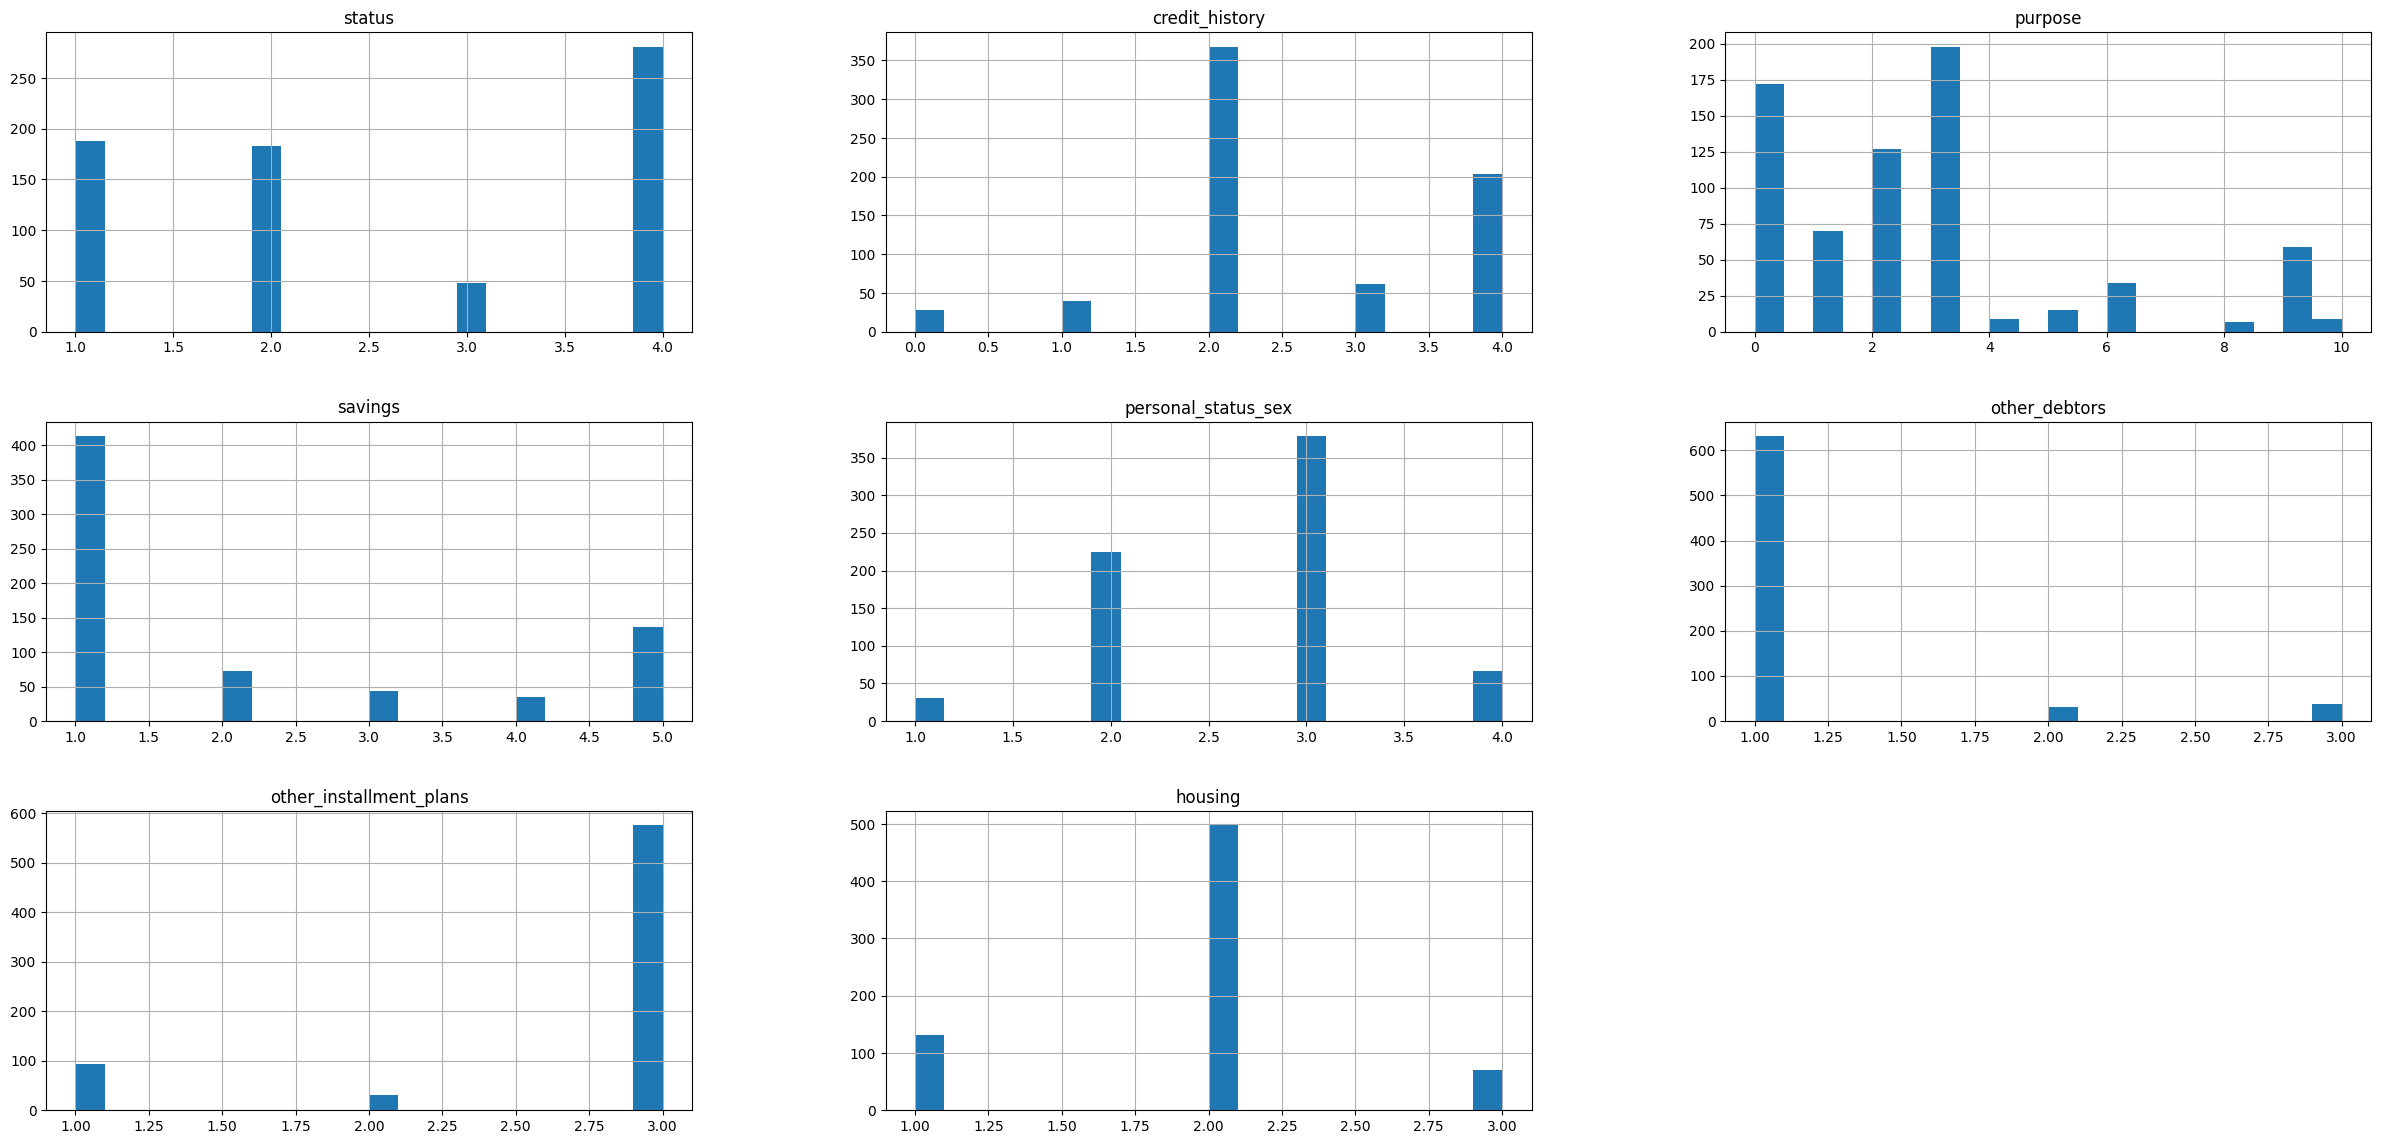

In [ ]:
Xtrain[categoricas].hist(figsize=(30,14), bins=20)
plt.show()

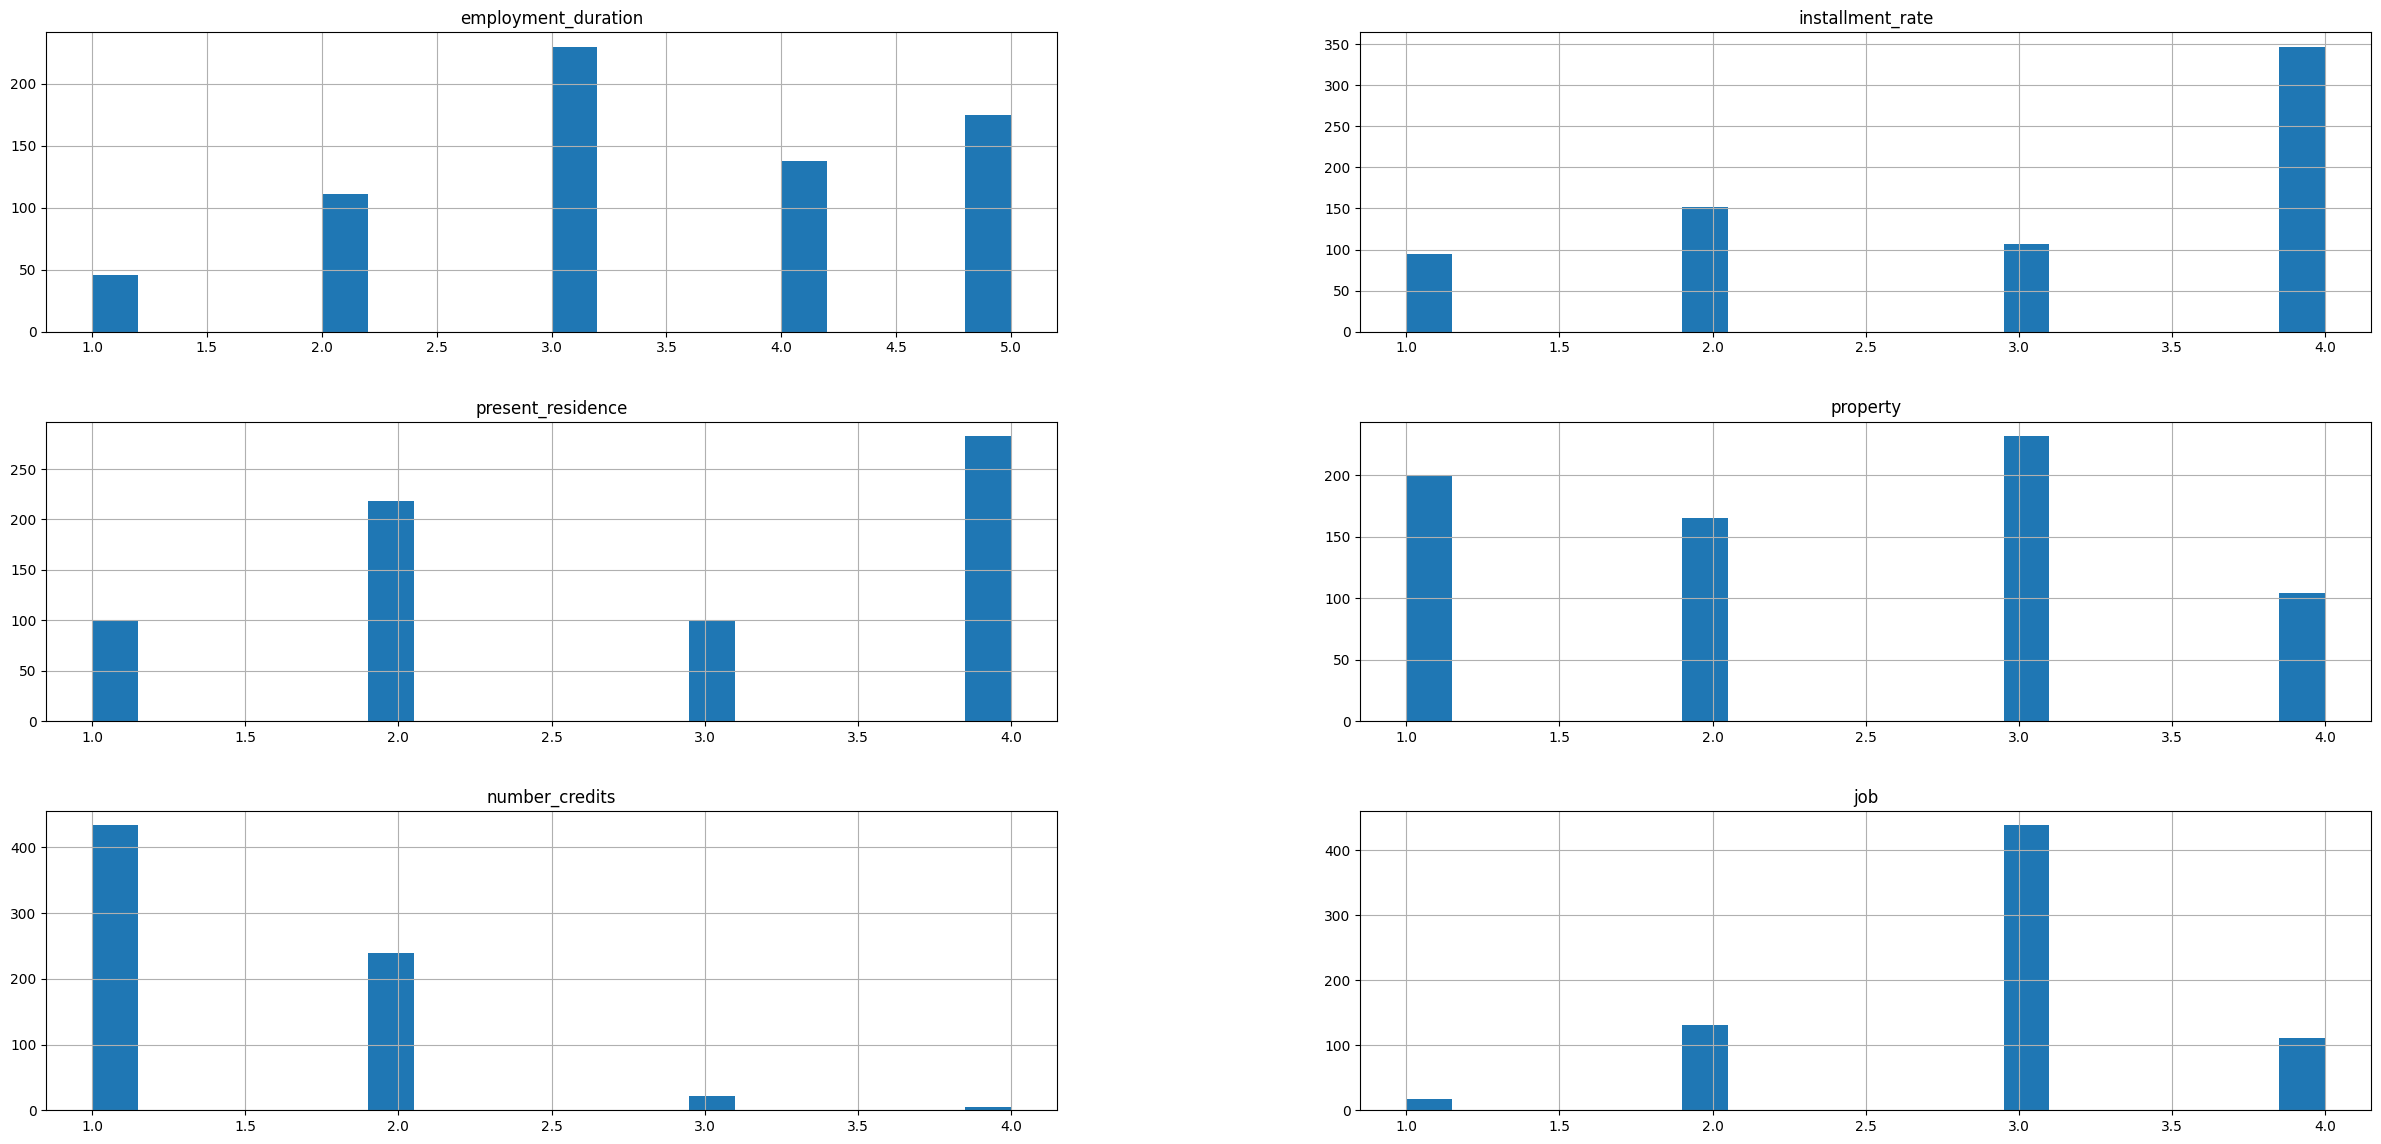

In [ ]:
Xtrain[ordinales].hist(figsize=(30,14), bins=20)
plt.show()

Al ser todas ya en numero, las categoricas no necesitan ser transformadas, las nominales ya estan en numeros, ( de un rango del 1-10 como maximo) las ordinales tambien son numeros ( hasta 5 niveles), y las bianarias tambien ya tienen solo 2 opciones.

Asi que  tendremos que observar ahora las numericas.


In [ ]:
misdatos= Xtrain[numericas]

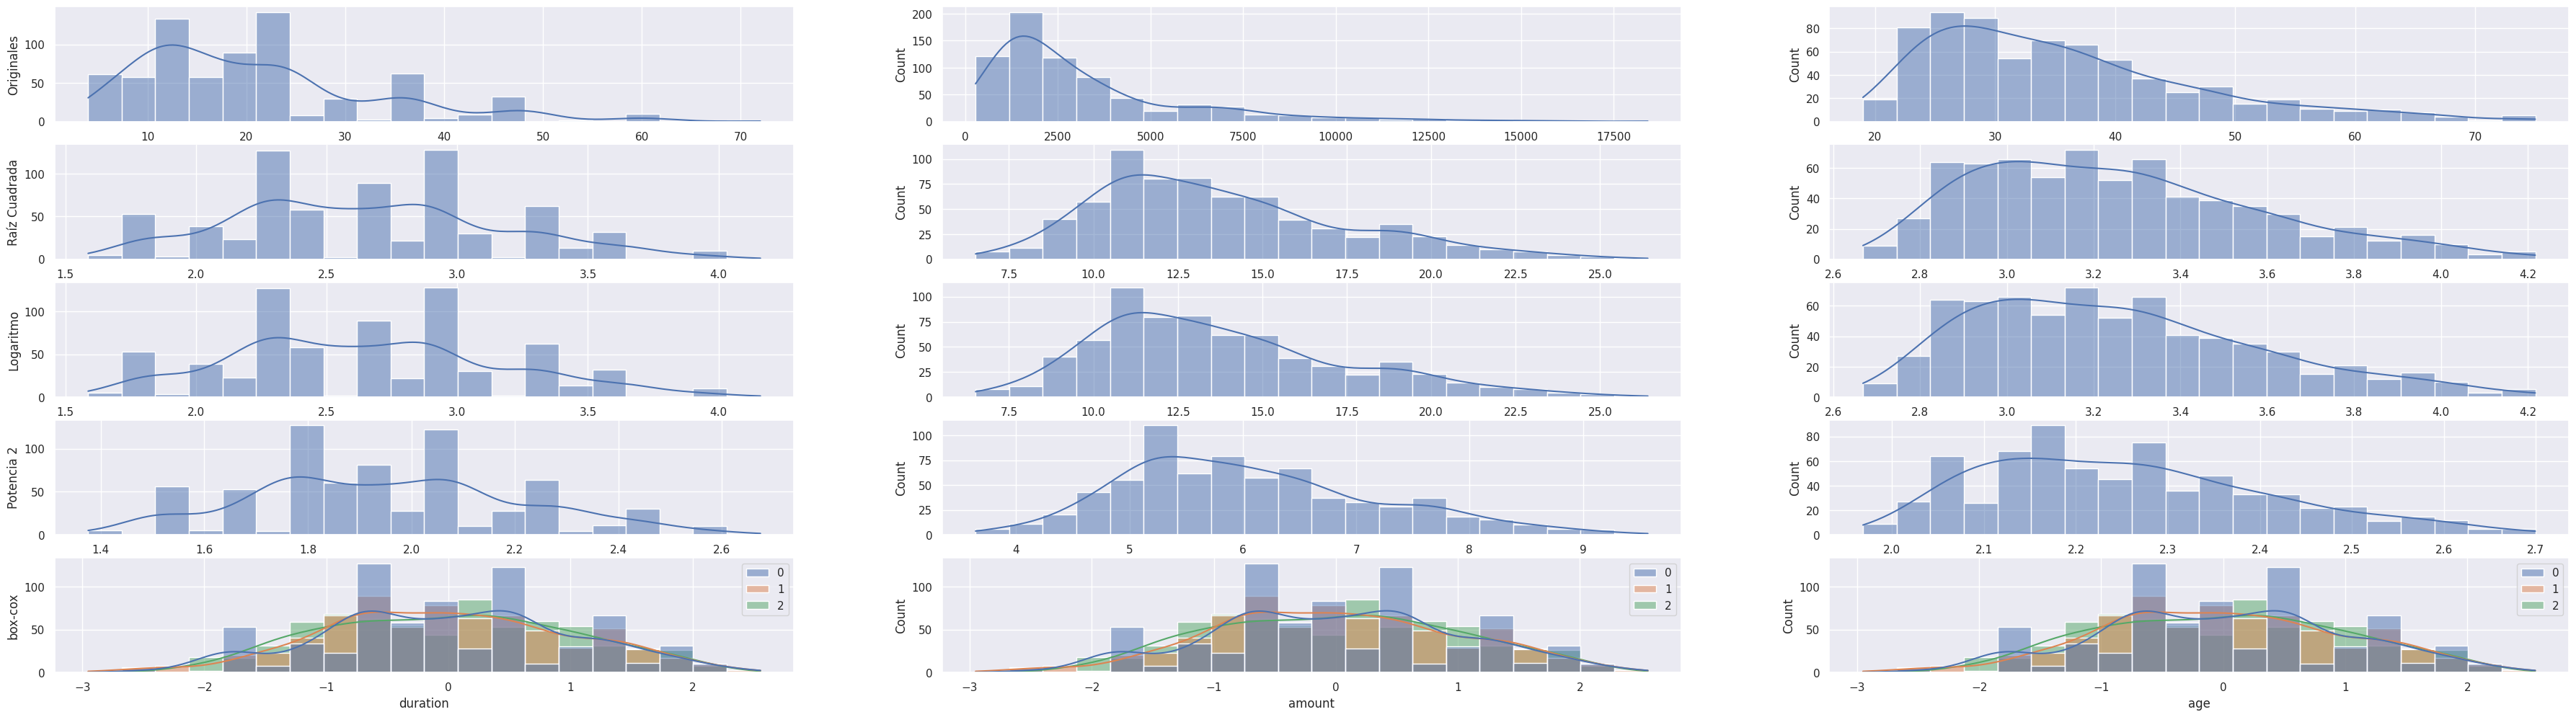

In [ ]:
#analisis visual de las variables
sns.set(rc={'figure.figsize':(45,12)})
power_transformer = PowerTransformer(method='box-cox')

columns = len(numericas)
fig, axes = plt.subplots(5, columns)

for k in range(0,columns):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,columns,k+1)

    Transf0 = misdatos[numericas[k]]         #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    sns.histplot(Transf0, bins=20, kde=True)                             #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(numericas[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,columns,k+4)

    Transf1 = np.cbrt(misdatos[numericas[k]])   #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=20, kde=True)                                #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(numericas[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,columns,k+7)

    Transf2 = np.log(misdatos[numericas[k]]+1)  #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=20, kde=True)                              #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(numericas[k])
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,columns,k+10)

    Transf3 = np.power(misdatos[numericas[k]], .23)  #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    sns.histplot(Transf3, bins=20, kde=True)                               #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(numericas[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,columns,k+13)

    Transf4 = power_transformer.fit_transform(misdatos[numericas]) #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf4, bins=20, kde=True)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(numericas[k])
    if k==0:
      plt.ylabel('box-cox')


Al observar la representacion visual de la distribuccion de las variables numericas originales, vemos como estan sezgadas, la mejor transformacion para las numericas seria yeo-jhonson para mejorar la distribuccion y utilzar tambien min-max para esclar y normalizarlas



### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*  duration-  box-cox
*   amount- box-cox
* age- box-cox

En este caso se utilizara la transformacion box-cox ya que se observa como las variables numericas corrigen su distribucion al usar esta transformacion.

Al tener un rango de -3 a 2 no se necesitaria escalar.



etc ...


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = Xtrain[numericas]
num_pipe_nombres = numericas
num_pipe = Xtrain[numericas]
num_pipe_nombres = numericas
num_prepro_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scalar', MinMaxScaler(feature_range=(1, 2))),
    ('power_transform', PowerTransformer(method='box-cox'))
])

# Variables categóricas:
cat_pipe = Xtrain[categoricas]
cat_pipe_nombres = categoricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',))
    ])

# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipe_nombres),('cat', categorical_transformer,cat_pipe_nombres)],
                                        remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessor', columnasTransformer),
                           # Agrega tu modelo aquí
                           # ('model', TuModelo())
                           ])

pipeline.fit(Xtrain, ytrain)

# Transformamos los datos de validación y prueba
Xval_transformed = pipeline.transform(Xval)
Xtrain_transformed= pipeline.transform(Xtrain)
Xtest_transformed = pipeline.transform(Xtest)
# *********** Aquí termina la sección de agregar código *************

XvalT = pd.DataFrame(Xval_transformed, columns=Xval.columns)
XtestT = pd.DataFrame(Xtest_transformed, columns=Xtest.columns)
XtrainT = pd.DataFrame(Xtrain_transformed, columns=Xtrain.columns)


In [ ]:
XvalT

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,-0.018198,1.359548,0.933337,2.0,3.0,5.0,1.0,3.0,1.0,3.0,2.0,3.0,2.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0
1,-1.700275,2.023933,-1.432487,2.0,2.0,0.0,5.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
2,-0.737951,-0.385966,0.087673,2.0,4.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0
3,0.959776,1.583941,1.856890,4.0,4.0,1.0,5.0,3.0,1.0,3.0,2.0,5.0,1.0,4.0,3.0,2.0,3.0,2.0,1.0,2.0
4,-1.700275,2.032428,2.014948,1.0,2.0,0.0,1.0,3.0,1.0,1.0,2.0,5.0,1.0,4.0,4.0,1.0,4.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.737951,-0.287278,-0.780478,2.0,4.0,0.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,1.0,3.0,1.0,3.0,2.0,1.0,2.0
146,0.959776,0.859412,-0.930916,2.0,0.0,9.0,2.0,2.0,1.0,3.0,1.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0
147,-0.737951,-1.541391,-1.256331,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,3.0,4.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0
148,1.298299,-0.416854,0.380864,4.0,2.0,6.0,1.0,3.0,1.0,2.0,3.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,2.0,2.0


## **Ejercicio 7**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([XtrainT, XvalT], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=5000, class_weight={0: 1, 1: 10}, ))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier( n_neighbors=7, metric='euclidean', weights='uniform', algorithm='brute' ))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=2, min_samples_split=5, random_state=42 ))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42 ))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier( n_estimators=100,  # Número de árboles en el bosque
    max_depth=3,       # Profundidad máxima de cada árbol
    learning_rate=0.1, # Tasa de aprendizaje
    gamma=0,           # Parámetro de regularización
    subsample=0.8,     # Proporción de muestras utilizadas para entrenar cada árbol
    colsample_bytree=0.8, # Proporción de características utilizadas para entrenar cada árbol
    random_state=42))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                    max_iter=200, shuffle=True, random_state=42 ))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC( C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42 ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_recall 0.928 (0.034)
	 train_recall 0.961 (0.008)
	 test_f1 0.520 (0.014)
	 train_f1 0.534 (0.011)
	 test_precision 0.361 (0.011)
	 train_precision 0.370 (0.011)
	 test_roc_auc 0.780 (0.039)
	 train_roc_auc 0.809 (0.009)
	 test_accuracy 0.498 (0.020)
	 train_accuracy 0.508 (0.022)
>> kNN
	 test_recall 0.375 (0.064)
	 train_recall 0.504 (0.033)
	 test_f1 0.441 (0.059)
	 train_f1 0.592 (0.025)
	 test_precision 0.543 (0.065)
	 train_precision 0.720 (0.026)
	 test_roc_auc 0.726 (0.041)
	 train_roc_auc 0.857 (0.009)
	 test_accuracy 0.723 (0.027)
	 train_accuracy 0.797 (0.010)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

>> DTree
	 test_recall 0.245 (0.242)
	 train_recall 0.281 (0.263)
	 test_f1 0.247 (0.224)
	 train_f1 0.290 (0.248)
	 test_precision 0.271 (0.228)
	 train_precision 0.342 (0.286)
	 test_roc_auc 0.695 (0.037)
	 train_roc_auc 0.731 (0.007)
	 test_accuracy 0.694 (0.027)
	 train_accuracy 0.719 (0.014)
>> RF
	 test_recall 0.046 (0.028)
	 train_recall 0.105 (0.027)
	 test_f1 0.084 (0.049)
	 train_f1 0.189 (0.043)
	 test_precision 0.713 (0.289)
	 train_precision 0.985 (0.018)
	 test_roc_auc 0.777 (0.040)
	 train_roc_auc 0.849 (0.006)
	 test_accuracy 0.715 (0.010)
	 train_accuracy 0.737 (0.007)
>> XGBoost
	 test_recall 0.474 (0.073)
	 train_recall 0.744 (0.020)
	 test_f1 0.536 (0.063)
	 train_f1 0.811 (0.014)
	 test_precision 0.623 (0.065)
	 train_precision 0.893 (0.016)
	 test_roc_auc 0.797 (0.028)
	 train_roc_auc 0.960 (0.003)
	 test_accuracy 0.761 (0.028)
	 train_accuracy 0.899 (0.007)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

>> MLP
	 test_recall 0.503 (0.076)
	 train_recall 0.708 (0.017)
	 test_f1 0.545 (0.058)
	 train_f1 0.771 (0.011)
	 test_precision 0.601 (0.056)
	 train_precision 0.848 (0.025)
	 test_roc_auc 0.773 (0.031)
	 train_roc_auc 0.933 (0.005)
	 test_accuracy 0.756 (0.025)
	 train_accuracy 0.877 (0.007)
>> SVM
	 test_recall 0.386 (0.040)
	 train_recall 0.467 (0.037)
	 test_f1 0.488 (0.041)
	 train_f1 0.583 (0.029)
	 test_precision 0.670 (0.070)
	 train_precision 0.778 (0.018)
	 test_roc_auc 0.779 (0.035)
	 train_roc_auc 0.858 (0.007)
	 test_accuracy 0.763 (0.020)
	 train_accuracy 0.805 (0.008)


## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

En este caso, nuestra clase positiva es mal cliente (1), bien entonces al banco le precisa saber e identificar quienes son malos clientes ya que esto muestra un gran riesgo al otorgar el credito.

Bien entonces, el error mas costoso para el banco es FN, ya que si uno identifica erronamente a una persona como un buen cliente (0) y como tal, fue erronamente clasificado y realmente pertenece a un mal cliente (1), esto genera un gran riesgo al banco que dicha persona no pueda pagar su prestamo y generar perdidas para el banco.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

Dado que el error más costoso es el falso negativo (FN), las métricas más importantes a considerar en la matriz de confusión son aquellas que se centran en la tasa de error de tipo II, como la sensibilidad (recall) y el f1 score, solo que cabe aclarar que este ultimo es para clases balanceadas ( que despues de balancear la clase se puede tomar en cuenta).

 La sensibilidad (recall) mide la proporción de positivos reales que se identifican correctamente como tales, mientras que el valor F1 proporciona un equilibrio entre precisión y sensibilidad, lo que lo hace útil cuando las clases están desequilibradas.

 Tambien seria la Accuracy ya que ella mide la "presicion" general de ambas clases, tanto VP, VN y FP y FN

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

**Puntuación ROC-AUC:** Calcula el área bajo la curva ROC (Receiver Operating Characteristic), que es una medida de la capacidad del modelo para distinguir entre clases positivas y negativas.

**Tasa de falsos negativos** (False Negative Rate, FNR): Mide la proporción de casos positivos reales que el modelo clasifica incorrectamente como negativos.
FNR
=
FN
FN
+
TP
FNR=
FN+TP
FN
​

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

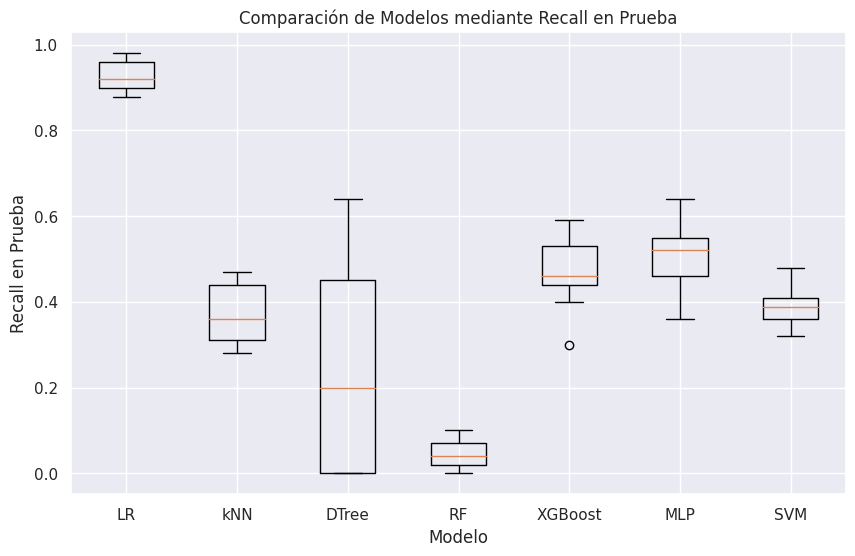

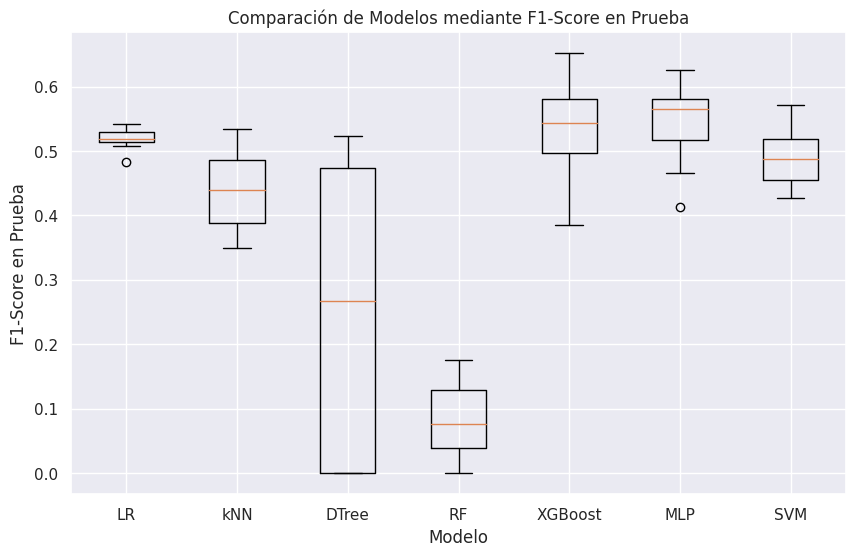

In [ ]:
 #Lista de resultados de recall y f1-score en prueba para cada modelo
recall_results = [scores['test_recall'] for scores in resultados]
f1_score_results = [scores['test_f1'] for scores in resultados]

# Nombres de los modelos
nombres_modelos = ['LR', 'kNN', 'DTree', 'RF', 'XGBoost', 'MLP', 'SVM']

# Crear el diagrama de caja y bigotes para recall
plt.figure(figsize=(10, 6))
plt.boxplot(recall_results, labels=nombres_modelos)
plt.title('Comparación de Modelos mediante Recall en Prueba')
plt.xlabel('Modelo')
plt.ylabel('Recall en Prueba')
plt.grid(True)
plt.show()

# Crear el diagrama de caja y bigotes para f1-score
plt.figure(figsize=(10, 6))
plt.boxplot(f1_score_results, labels=nombres_modelos)
plt.title('Comparación de Modelos mediante F1-Score en Prueba')
plt.xlabel('Modelo')
plt.ylabel('F1-Score en Prueba')
plt.grid(True)
plt.show()

# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

modelos = [LogisticRegression(), XGBClassifier(), MLPClassifier()]

# Definir la técnica de sobremuestreo
smote = SMOTE(random_state=42)

# Definir las métricas a evaluar
metricas = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

for modelo in modelos:
    # Aplicar SMOTE a los datos de entrenamiento
    X_resampled, y_resampled = smote.fit_resample(Xtrainval, ytrainval)

    # Crear un pipeline con el modelo
    pipeline = Pipeline([('modelo', modelo)])

    # Realizar validación cruzada
    resultados = cross_validate(pipeline, X_resampled, y_resampled, scoring=metricas, cv=5)

    # Calcular y mostrar las métricas promedio
    print("Modelo:", modelo.__class__.__name__)
    print("Accuracy:", resultados['test_accuracy'].mean())
    print("Precision:", resultados['test_precision'].mean())
    print("Recall:", resultados['test_recall'].mean())
    print("F1 Score:", resultados['test_f1'].mean())
    print("ROC AUC Score:", resultados['test_roc_auc'].mean())
    print()

# *********** Aquí termina la sección de agregar código *************

Modelo: LogisticRegression
Accuracy: 0.7363105117565698
Precision: 0.7297320878054052
Recall: 0.7520936639118456
F1 Score: 0.7401513627098968
ROC AUC Score: 0.7995802341597795

Modelo: XGBClassifier
Accuracy: 0.8338347164591978
Precision: 0.854019651044631
Recall: 0.7974793388429753
F1 Score: 0.8080924495545376
ROC AUC Score: 0.917007116620753



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo: MLPClassifier
Accuracy: 0.7962448132780083
Precision: 0.7786936086352804
Recall: 0.8303719008264462
F1 Score: 0.8022853743647407
ROC AUC Score: 0.8728930211202938



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En este caso, de los 3 modelos, el mejor  es  MLP, debido a que ofrece un mejorbalance entre todas las metricas, el recall esta en un buen valor (.81), ofrece un mejor balance en performance para los modelos.

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [ ]:
#o.g
#smote = SMOTE(random_state=42)
#Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrainval, ytrainval)

# Definir el clasificador XGBoost
#xgb_classifier = XGBClassifier()

# Definir los hiperparámetros a ajustar
#param_grid = {
 #      'learning_rate': [0.01, 0.1, 0.2],
  #  'n_estimators': [100, 200, 300],
   # 'max_depth': [3, 4, 5],
    #'min_child_weight': [1, 5, 10],
    #'subsample': [0.8, 0.9, 1.0],
    #'colsample_bytree': [0.8, 0.9, 1.0],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 0.2]
     # }

# Configurar GridSearchCV para encontrar la mejor combinación de hiperparámetros
#grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                         #  scoring='recall', cv=5)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento escalados
#grid_search.fit(Xtrain_resampled, ytrain_resampled)

# Obtener el mejor modelo
#best_xgb_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba escalado
#y_pred = best_xgb_model.predict(Xtrain_resampled)

# Mostrar métricas de evaluación
#print("Reporte de clasificación:")
#print(classification_report(ytrain_resampled,y_pred))

# Mostrar los mejores hiperparámetros encontrados
#print("\nMejores hiperparámetros encontrados:")
#print(grid_search.best_params_)

In [ ]:
#con stratified Kfold
smote = SMOTE(random_state=42)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrainval, ytrainval)

# Definir el clasificador XGBoost
xgb_classifier = XGBClassifier()

# Definir los hiperparámetros a ajustar
param_grid = {
       'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
       'reg_alpha': [0, 0.1, 0.2],
       'reg_lambda': [0, 0.1]
         }
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Configurar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='recall', cv=cv_stratified, verbose=1)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento escalados
grid_search.fit(Xtrain_resampled, ytrain_resampled)

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba escalado
y_pred = best_xgb_model.predict(Xtrain_resampled)

# Mostrar métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(ytrain_resampled,y_pred))

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 13122 candidates, totalling 65610 fits


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.
# ************* Inlcuye aquí tu código:**************************

y_pred_test = xgb_classifier.predict(XtestT)
# Mostrar métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(ytest,y_pred_test))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        99
           1       0.48      0.59      0.53        51

    accuracy                           0.65       150
   macro avg       0.62      0.63      0.62       150
weighted avg       0.67      0.65      0.65       150



In [ ]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************
conf_matrix= confusion_matrix(ytest, y_pred_test)



print('Matriz de Confusión:')
print(conf_matrix)

# *********** Aquí termina la sección de agregar código *************

In [ ]:
 #c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

# Get feature importances
importance_coef = best_xgb_model.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(range(len(importance_coef)), importance_coef)
plt.xticks(range(len(importance_coef)), Xtrainval.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Coefficients')
plt.title('Feature Importance')
plt.show()

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++



### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**